<a href="https://colab.research.google.com/github/coopaloop536/Cooper_CO2_Emissions/blob/main/CO2_Emissions_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install pandas
import pandas as pd

!pip install matplotlib
import matplotlib.pyplot as plt


In [4]:
url = 'https://pasteur.epa.gov/uploads/10.23719/1531143/SupplyChainGHGEmissionFactors_v1.3.0_NAICS_byGHG_USD2022.csv'
df = pd.read_csv(url)
df.head(20)

,2017 NAICS Code,2017 NAICS Title,GHG,Unit,Supply Chain Emission Factors without Margins,Margins of Supply Chain Emission Factors,Supply Chain Emission Factors with Margins,Reference USEEIO Code
0,111110,Soybean Farming,HFC-23,"kg/2022 USD, purchaser price",3.230000e-09,1.340000e-09,4.570000e-09,1111A0
1,111110,Soybean Farming,Carbon dioxide,"kg/2022 USD, purchaser price",1.340000e-01,3.780000e-02,1.720000e-01,1111A0
2,111110,Soybean Farming,HFC-236fa,"kg/2022 USD, purchaser price",1.440000e-10,2.020000e-10,3.450000e-10,1111A0
3,111110,Soybean Farming,Carbon tetrafluoride,"kg/2022 USD, purchaser price",5.130000e-09,5.970000e-09,1.110000e-08,1111A0
4,111110,Soybean Farming,HFC-32,"kg/2022 USD, purchaser price",3.000000e-08,4.200000e-08,7.200000e-08,1111A0
5,111110,Soybean Farming,Hexafluoroethane,"kg/2022 USD, purchaser price",5.420000e-10,1.510000e-09,2.050000e-09,1111A0
6,111110,Soybean Farming,"HFCs and PFCs, unspecified","kg CO2e/2022 USD, purchaser price",3.580000e-04,4.860000e-04,8.440000e-04,1111A0
7,111110,Soybean Farming,HFC-125,"kg/2022 USD, purchaser price",4.560000e-08,6.190000e-08,1.080000e-07,1111A0
8,111110,Soybean Farming,Methane,"kg/2022 USD, purchaser price",3.310000e-04,1.510000e-04,4.820000e-04,1111A0
9,111110,Soybean Farming,HFC-134a,"kg/2022 USD, purchaser price",7.480000e-08,1.010000e-07,1.760000e-07,1111A0


In [5]:
renamed_columns = {'2017 NAICS Code':'NAICS Code', '2017 NAICS Title':'Industry Title', 'GHG':'Greenhouse Gas Type', 'Unit':'Gas/USD', 'Supply Chain Emission Factors without Margins':'Emissions per Dollar w/ no Margains', 'Margins of Supply Chain Emission Factors':'Margins', 'Supply Chain Emission Factors with Margins':'Emissions per Dollar w/ Margains'}

df = df.rename(columns=renamed_columns)

df['NAICS Code'] = pd.to_numeric(df['NAICS Code'], errors='coerce')

df = df.dropna(subset=['NAICS Code'])

df['NAICS Code'] = df['NAICS Code'].astype(str)

grouped_2digit = df['NAICS Code'].str[:2]

grouped_2digit = df.groupby(grouped_2digit)['Emissions per Dollar w/ Margains'].mean()


df.head(20)



,NAICS Code,Industry Title,Greenhouse Gas Type,Gas/USD,Emissions per Dollar w/ no Margains,Margins,Emissions per Dollar w/ Margains,Reference USEEIO Code
0,111110,Soybean Farming,HFC-23,"kg/2022 USD, purchaser price",3.230000e-09,1.340000e-09,4.570000e-09,1111A0
1,111110,Soybean Farming,Carbon dioxide,"kg/2022 USD, purchaser price",1.340000e-01,3.780000e-02,1.720000e-01,1111A0
2,111110,Soybean Farming,HFC-236fa,"kg/2022 USD, purchaser price",1.440000e-10,2.020000e-10,3.450000e-10,1111A0
3,111110,Soybean Farming,Carbon tetrafluoride,"kg/2022 USD, purchaser price",5.130000e-09,5.970000e-09,1.110000e-08,1111A0
4,111110,Soybean Farming,HFC-32,"kg/2022 USD, purchaser price",3.000000e-08,4.200000e-08,7.200000e-08,1111A0
5,111110,Soybean Farming,Hexafluoroethane,"kg/2022 USD, purchaser price",5.420000e-10,1.510000e-09,2.050000e-09,1111A0
6,111110,Soybean Farming,"HFCs and PFCs, unspecified","kg CO2e/2022 USD, purchaser price",3.580000e-04,4.860000e-04,8.440000e-04,1111A0
7,111110,Soybean Farming,HFC-125,"kg/2022 USD, purchaser price",4.560000e-08,6.190000e-08,1.080000e-07,1111A0
8,111110,Soybean Farming,Methane,"kg/2022 USD, purchaser price",3.310000e-04,1.510000e-04,4.820000e-04,1111A0
9,111110,Soybean Farming,HFC-134a,"kg/2022 USD, purchaser price",7.480000e-08,1.010000e-07,1.760000e-07,1111A0


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


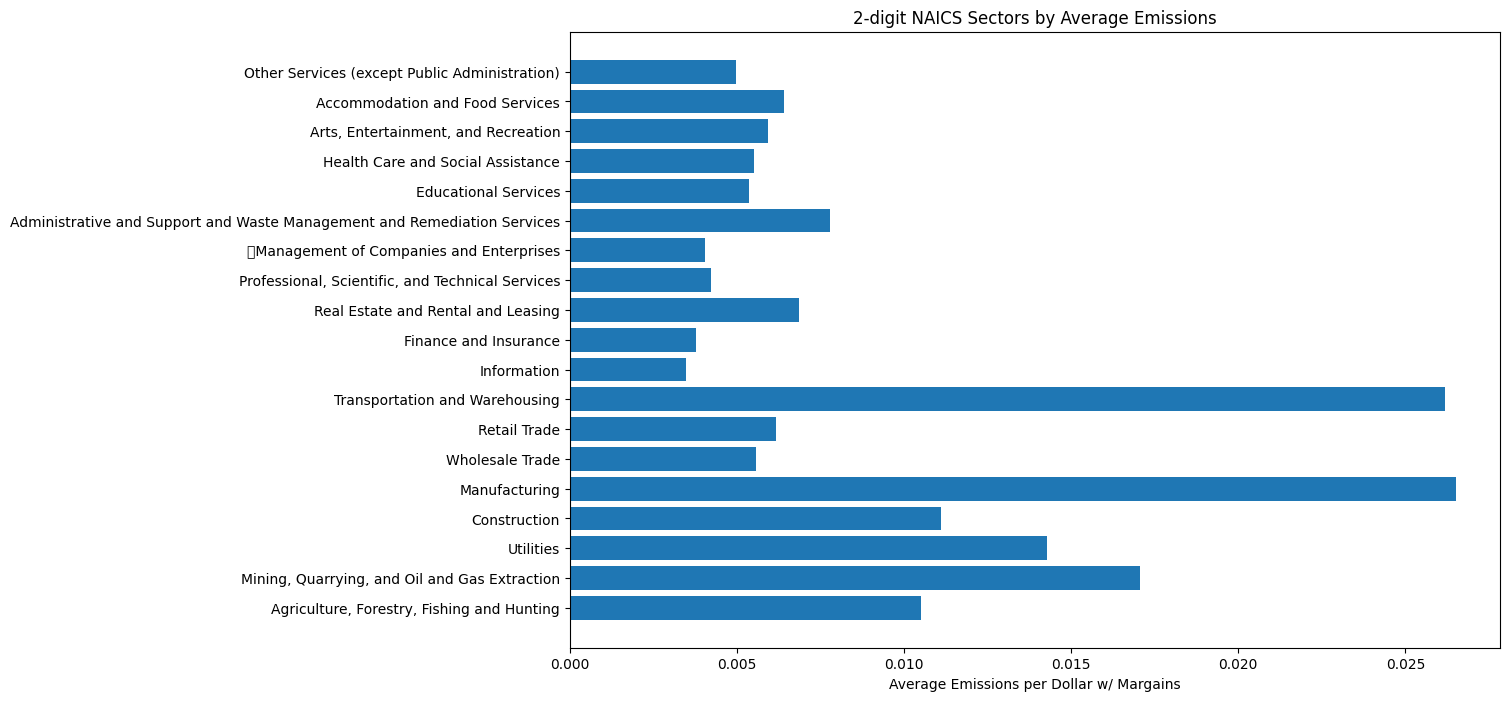

In [6]:
naics_2digit_names = {
    '11': 'Agriculture, Forestry, Fishing and Hunting',
    '21': 'Mining, Quarrying, and Oil and Gas Extraction',
    '22': 'Utilities',
    '23': 'Construction',
    '31': 'Manufacturing',
    '32': 'Manufacturing',
    '33': 'Manufacturing',
    '42': 'Wholesale Trade',
    '44': 'Retail Trade',
    '48': 'Transportation and Warehousing',
    '56': 'Administrative and Support and Waste Management and Remediation Services',
    '49': 'Transportation and Warehousing',
    '72': 'Accommodation and Food Services',
    '53': 'Real Estate and Rental and Leasing',
    '71': 'Arts, Entertainment, and Recreation',
    '62': 'Health Care and Social Assistance',
    '45': 'Retail Trade',
    '61': 'Educational Services',
    '81': 'Other Services (except Public Administration)',
    '51': 'Information',
    '52': 'Finance and Insurance',
    '54': 'Professional, Scientific, and Technical Services',
    '55': '	Management of Companies and Enterprises'


    }

labels = grouped_2digit.index.map(naics_2digit_names.get).fillna('You messed up')
plt.figure(figsize=(12, 8))
plt.barh(labels, grouped_2digit)

plt.xlabel('Average Emissions per Dollar w/ Margains')
plt.title('2-digit NAICS Sectors by Average Emissions')
plt.show()

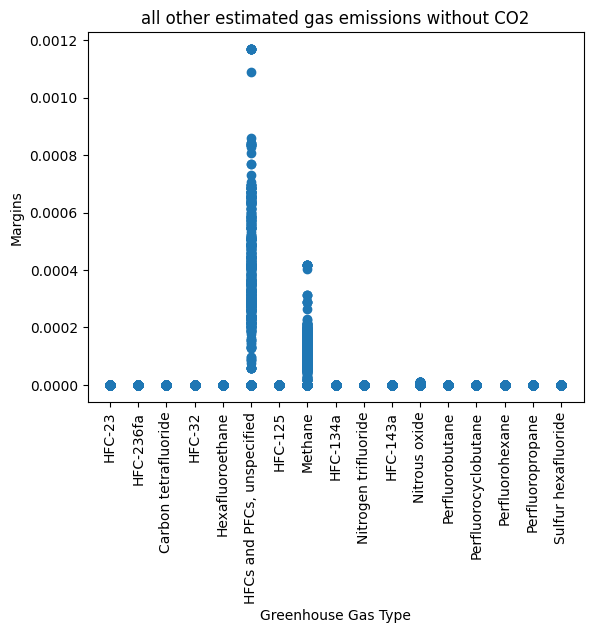

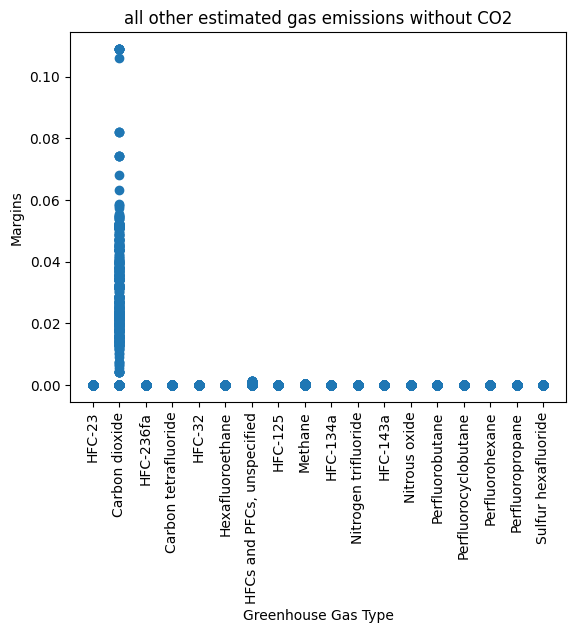

In [7]:
no_CO2_df = df[df['Greenhouse Gas Type'] != 'Carbon dioxide']
plt.scatter(no_CO2_df['Greenhouse Gas Type'], no_CO2_df['Margins'])
plt.xlabel('Greenhouse Gas Type')
plt.ylabel('Margins')
plt.title('all other estimated gas emissions without CO2')
plt.xticks(rotation=90)
plt.show()

plt.scatter(df['Greenhouse Gas Type'], df['Margins'])
plt.xlabel('Greenhouse Gas Type')
plt.ylabel('Margins')
plt.title('all other estimated gas emissions without CO2')
plt.xticks(rotation=90)
plt.show()

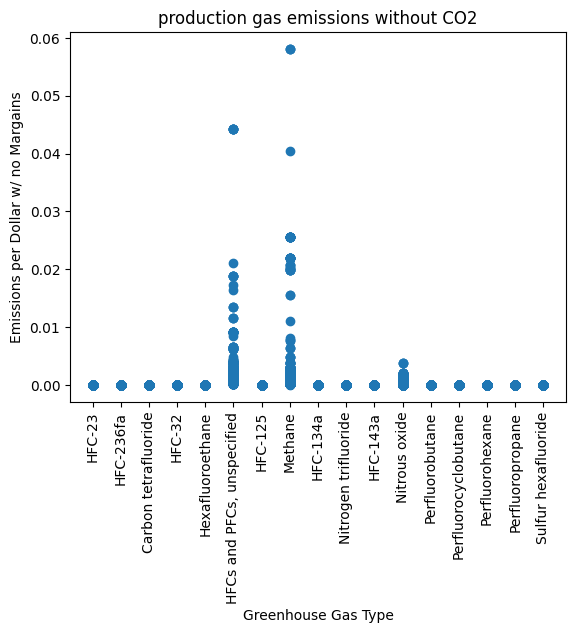

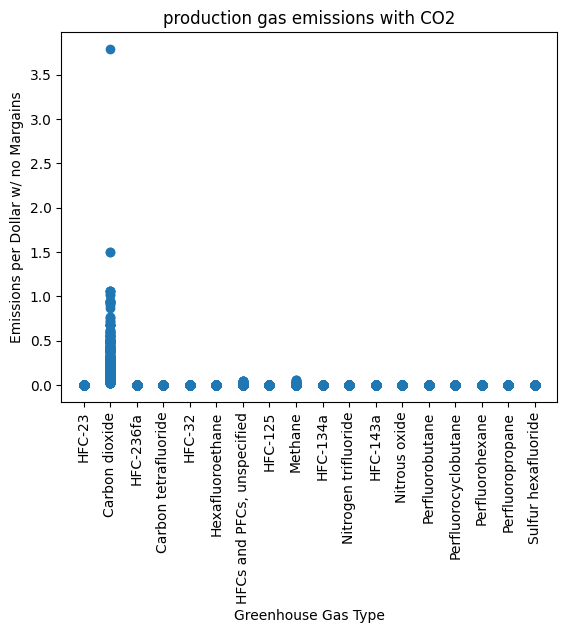

In [8]:
plt.scatter(no_CO2_df['Greenhouse Gas Type'], no_CO2_df['Emissions per Dollar w/ no Margains'])
plt.xlabel('Greenhouse Gas Type')
plt.ylabel('Emissions per Dollar w/ no Margains')
plt.title('production gas emissions without CO2')
plt.xticks(rotation=90)
plt.show()

plt.scatter(df['Greenhouse Gas Type'], df['Emissions per Dollar w/ no Margains'])
plt.xlabel('Greenhouse Gas Type')
plt.ylabel('Emissions per Dollar w/ no Margains')
plt.title('production gas emissions with CO2')
plt.xticks(rotation=90)
plt.show()

In [ ]:
## Are emission factors for greenhouse gases significantly different between specific industries?

In [9]:
## Frankensteined code from Day 6 Colab
from scipy.stats import ttest_ind, ttest_rel
print("4. Paired T-Test:")
for ghg in set(df['Greenhouse Gas Type']):
    df_ghg = df[df['Greenhouse Gas Type'] == ghg]
    t_stat, p_val = ttest_rel(df_ghg['Emissions per Dollar w/ Margains'], df_ghg['Emissions per Dollar w/ no Margains'])
    print(f"GHG_Type: {ghg}, T-Stat: {t_stat}, P-Value: {p_val}")
    if p_val > 0.05:
      print("There is no statistically significant difference.")
    else:
        print("There is a statistically significant difference.")

4. Paired T-Test:
GHG_Type: HFCs and PFCs, unspecified, T-Stat: 24.187376978094413, P-Value: 2.0088138383226452e-102
There is a statistically significant difference.
GHG_Type: HFC-236fa, T-Stat: 24.172050545978053, P-Value: 2.5423449599639646e-102
There is a statistically significant difference.
GHG_Type: Hexafluoroethane, T-Stat: 23.673645363061564, P-Value: 5.273838806940869e-99
There is a statistically significant difference.
GHG_Type: Methane, T-Stat: 23.188827523009685, P-Value: 8.502871855031967e-96
There is a statistically significant difference.
GHG_Type: Perfluorobutane, T-Stat: 23.94598309335612, P-Value: 8.16717568684536e-101
There is a statistically significant difference.
GHG_Type: Sulfur hexafluoride, T-Stat: 22.976236202609275, P-Value: 2.136515734859491e-94
There is a statistically significant difference.
GHG_Type: HFC-125, T-Stat: 24.187575197231077, P-Value: 2.002703165593977e-102
There is a statistically significant difference.
GHG_Type: Nitrogen trifluoride, T-Stat:

In [10]:
## After talking to my mentor I decided I'm going to go with a K-means clustering model so this was kinda pointless
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
df['ghg_encoded'] = LabelEncoder().fit_transform(df['Greenhouse Gas Type'])

X = df[['Emissions per Dollar w/ Margains', 'Emissions per Dollar w/ no Margains', 'Margins', 'ghg_encoded']]
y = df['NAICS Code'].str[:2]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
## giving models variable names
model1 = LogisticRegression(max_iter=2000)
model2 = RandomForestClassifier()
model3 = SVC()
## Cross-validation
scores1 = cross_val_score(model1, X_train, y_train, cv=5)
scores2 = cross_val_score(model2, X_train, y_train, cv=5)
scores3 = cross_val_score(model3, X_train, y_train, cv=5)
## Printing values
t_stat, p_val = ttest_ind(scores1, scores2)
print("Comparing Logistic Regression and Random Forest:")
print(f"T-Stat: {t_stat}, P-Value: {p_val}")

t_stat, p_val = ttest_ind(scores1, scores3)
print("\nComparing Logistic Regression and SVM:")
print(f"T-Stat: {t_stat}, P-Value: {p_val}")

t_stat, p_val = ttest_ind(scores2, scores3)
print("\nComparing Random Forest and SVM:")
print(f"T-Stat: {t_stat}, P-Value: {p_val}")

Comparing Logistic Regression and Random Forest:
T-Stat: -232.14469075980725, P-Value: 1.327137445399885e-16

Comparing Logistic Regression and SVM:
T-Stat: 2.323993481496302, P-Value: 0.04861540750676436

Comparing Random Forest and SVM:
T-Stat: 233.58030074700204, P-Value: 1.2632784439502873e-16


In [16]:
df.columns

Index(['NAICS Code', 'Industry Title', 'Greenhouse Gas Type', 'Gas/USD',
       'Emissions per Dollar w/ no Margains', 'Margins',
       'Emissions per Dollar w/ Margains', 'Reference USEEIO Code',
       'ghg_encoded'],
      dtype='object')

In [30]:
df_wide = df.pivot(index='NAICS Code', columns='Greenhouse Gas Type', values=[ 'Emissions per Dollar w/ Margains', 'Margins', 'Emissions per Dollar w/ no Margains'])
df_wide.head(45)

Emissions per Dollar w/ Margains                       \
Greenhouse Gas Type                   Carbon dioxide Carbon tetrafluoride   
NAICS Code                                                                  
111110                                         0.172         1.110000e-08   
111120                                         0.172         1.110000e-08   
111130                                         0.207         1.100000e-08   
111140                                         0.207         1.100000e-08   
111150                                         0.207         1.100000e-08   
111160                                         0.207         1.100000e-08   
111191                                         0.207         1.100000e-08   
111199                                         0.207         1.100000e-08   
111211                                         0.194         1.150000e-08   
111219                                         0.194         1.150000e-08   
111310                                         0.194         1.490000e-08   
111320                                         0.194         1.490000e-08   
111331                                         0.194         1.490000e-08   
111332                                         0.194         1.490000e-08   
111333                                         0.194         1.490000e-08   
111334                                         0.194         1.490000e-08   
111335                                         0.194         1.490000e-08   
111336                                         0.194         1.490000e-08   
111339                                         0.194         1.490000e-08   
111411                                         0.137         7.330000e-09   
111419                                         0.137         7.330000e-09   
111421                                         0.137         7.330000e-09   
111422                                         0.137         7.330000e-09   
111910                                         0.224         2.060000e-08   
111920                                         0.224         2.060000e-08   
111930                                         0.224         2.060000e-08   
111940                                         0.224         2.060000e-08   
111991                                         0.224         2.060000e-08   
111992                                         0.224         2.060000e-08   
111998                                         0.224         2.060000e-08   
112111                                         0.238         1.650000e-08   
112112                                         0.238         1.650000e-08   
112120                                         0.293         1.860000e-08   
112130                                         0.238         1.650000e-08   
112210                                         0.120         7.860000e-09   
112310                                         0.184         1.130000e-08   
112320                                         0.184         1.130000e-08   
112330                                         0.184         1.130000e-08   
112340                                         0.184         1.130000e-08   
112390                                         0.184         1.130000e-08   
112410                                         0.120         7.860000e-09   
112420                                         0.120         7.860000e-09   
112511                                         0.120         7.860000e-09   
112512                                         0.120         7.860000e-09   
112519                                         0.120         7.860000e-09   

                                                                             \
Greenhouse Gas Type       HFC-125      HFC-134a      HFC-143a        HFC-23   
NAICS Code                                                                    
111110               1.080000e-07  1.760000e-07  2.990000e-08  4.570000e-09   
111120 

In [26]:
df_wide.shape

(1016, 72)